In [68]:
# Loading libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import precision_recall_curve,precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator,TransformerMixin

In [ ]:
# Loading the iris Dataset
X,y = load_iris(return_X_y=True,as_frame=True)

In [5]:
# Head of the features dataframe
X.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [6]:
# Shape of the dataframe
X.shape

(150, 4)

In [7]:
# Check for null values
X.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [9]:
# Check for Duplicates
X.duplicated().sum()

1

In [10]:
# Lets check in the concatenated dataframe
df = pd.concat([X,y],axis=1)
df.shape

(150, 5)

In [11]:
# Lets check for duplicates
df.duplicated().sum()

1

In [12]:
# Dropping the duplicated rows
df.drop_duplicates(inplace=True)

In [13]:
# Lets check for duplicates
df.duplicated().sum()

0

# Univariate Analysis

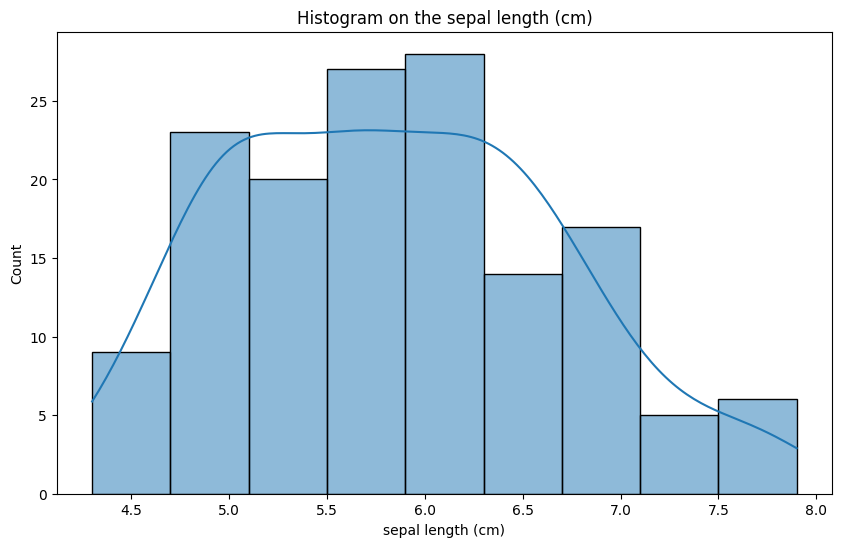

In [14]:
# Histogram on the Numerical columns
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='sepal length (cm)',kde=True)
plt.xlabel("sepal length (cm)")
plt.title("Histogram on the sepal length (cm)")
plt.show()

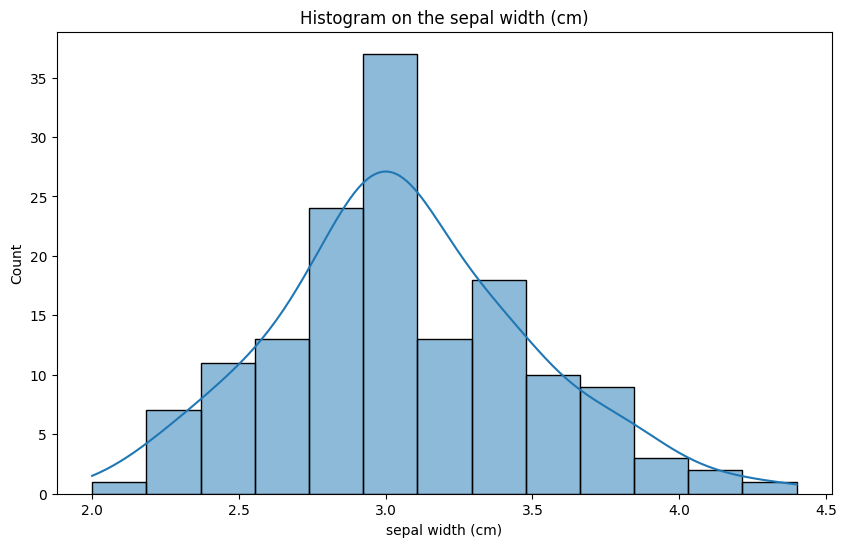

In [15]:
# Histogram on the Numerical columns
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='sepal width (cm)',kde=True)
plt.xlabel("sepal width (cm)")
plt.title("Histogram on the sepal width (cm)")
plt.show()

#

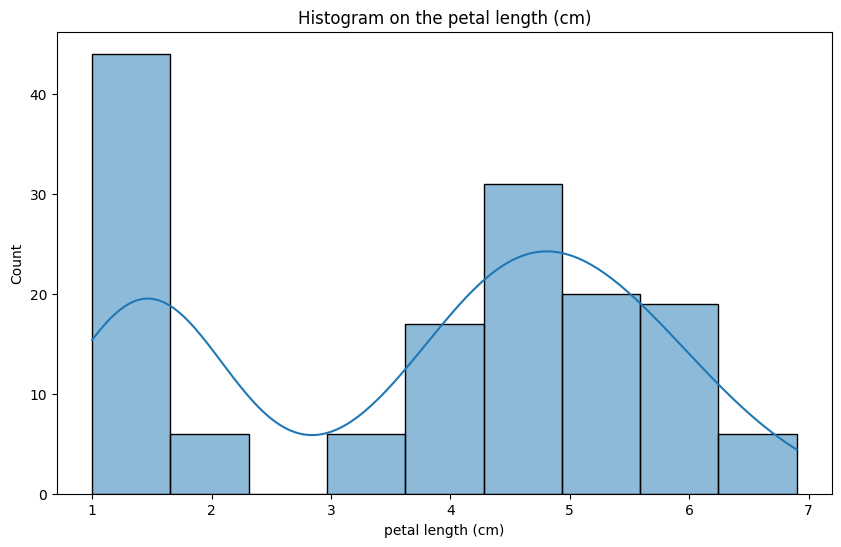

In [ ]:
# Histogram on the Numerical columns
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='petal length (cm)',kde=True)
plt.xlabel("petal length (cm)")
plt.title("Histogram on the petal length (cm)")
plt.show()

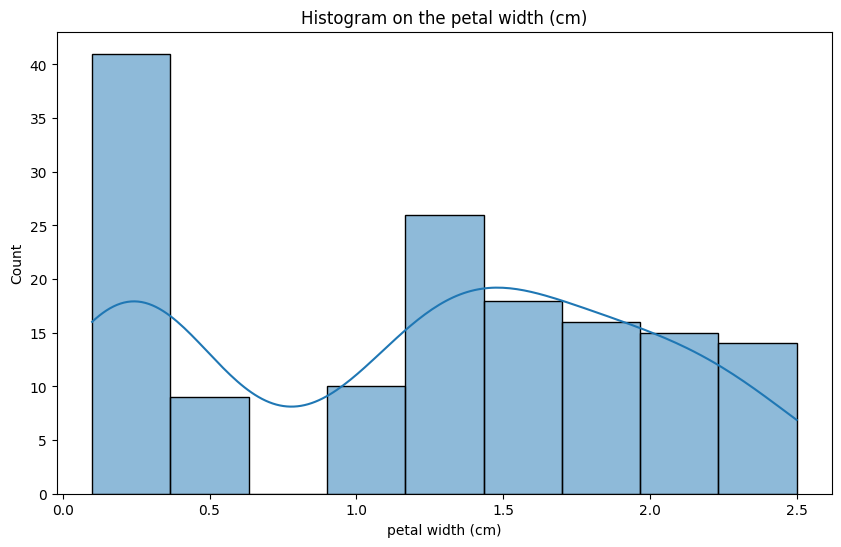

In [17]:
# Histogram on the Numerical columns
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='petal width (cm)',kde=True)
plt.xlabel("petal width (cm)")
plt.title("Histogram on the petal width (cm)")
plt.show()

c:\Users\chall\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chall\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chall\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


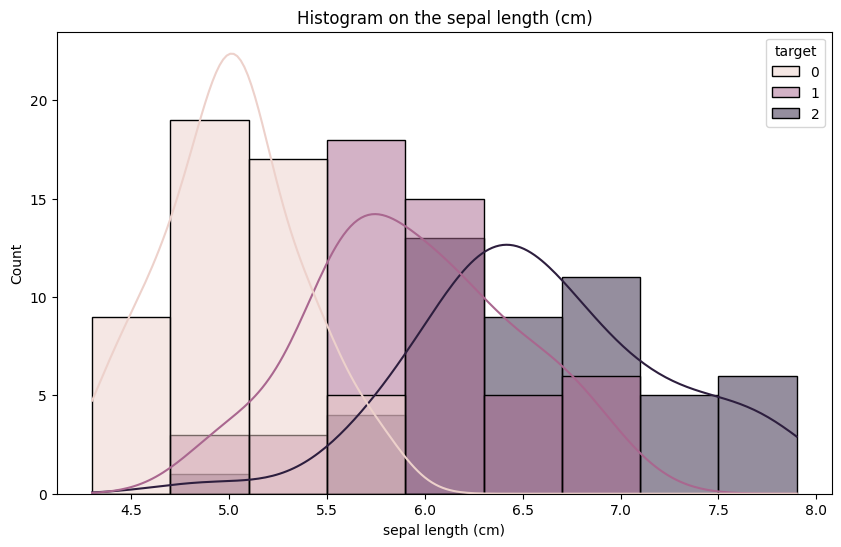

In [19]:
# Bivariate Analysis
# Histogram on the Numerical columns
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='sepal length (cm)',kde=True,hue='target')
plt.xlabel("sepal length (cm)")
plt.title("Histogram on the sepal length (cm)")
plt.show()

c:\Users\chall\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chall\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chall\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


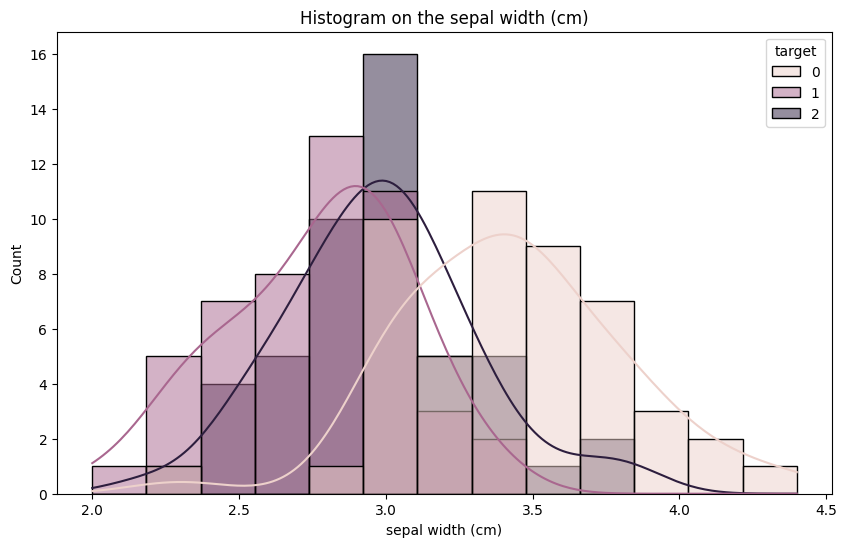

In [20]:
# Histogram on the Numerical columns
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='sepal width (cm)',kde=True,hue='target')
plt.xlabel("sepal width (cm)")
plt.title("Histogram on the sepal width (cm)")
plt.show()

c:\Users\chall\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chall\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chall\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


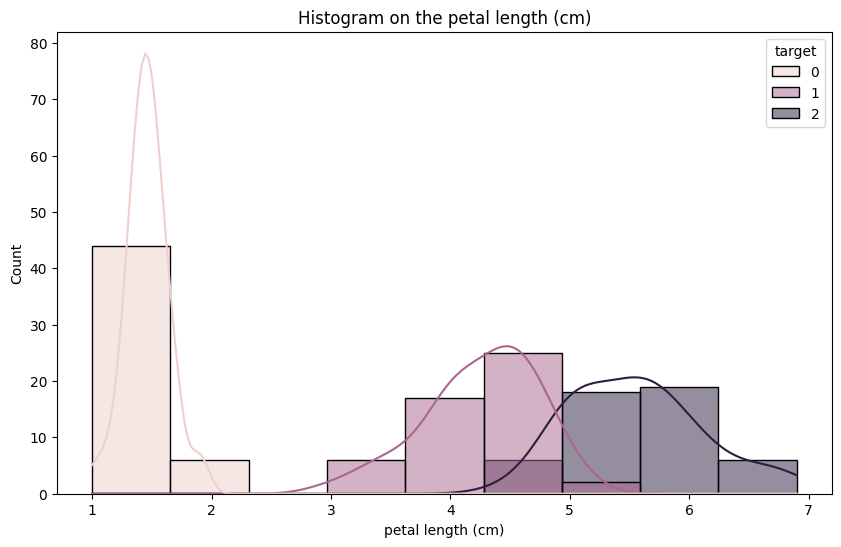

In [21]:
# Histogram on the Numerical columns
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='petal length (cm)',kde=True,hue='target')
plt.xlabel("petal length (cm)")
plt.title("Histogram on the petal length (cm)")
plt.show()

c:\Users\chall\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chall\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chall\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


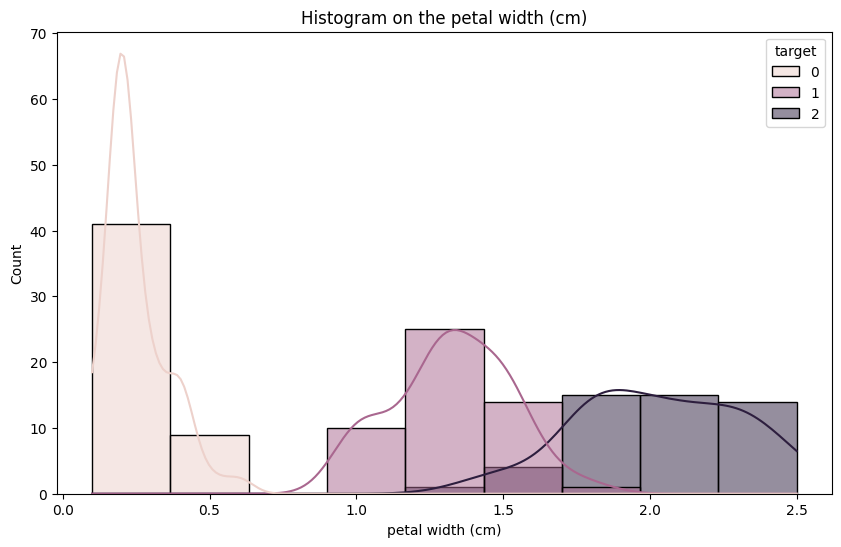

In [22]:
# Histogram on the Numerical columns
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='petal width (cm)',kde=True,hue='target')
plt.xlabel("petal width (cm)")
plt.title("Histogram on the petal width (cm)")
plt.show()

# Mutivariate Analysis

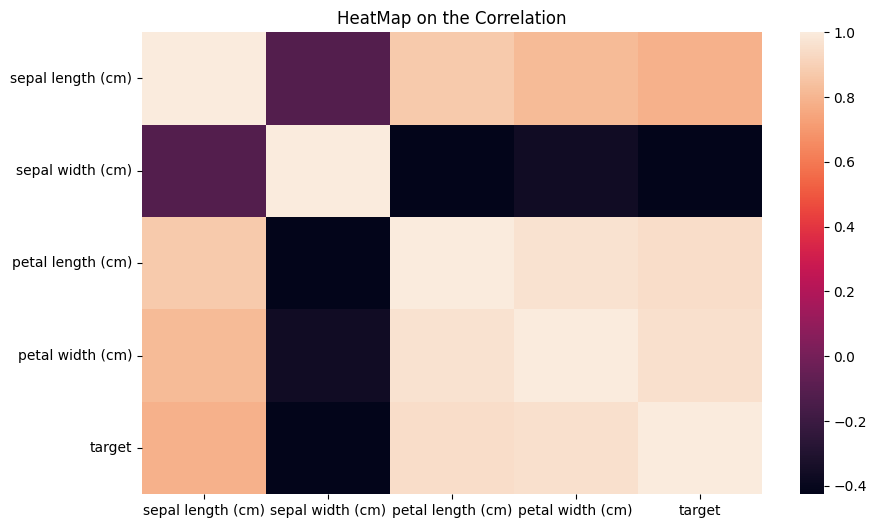

In [23]:
# Heatmap on correlation
plt.figure(figsize=(10,6))
sns.heatmap(data=df.corr())
plt.title("HeatMap on the Correlation")
plt.show()

c:\Users\chall\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chall\anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\chall\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chall\anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in

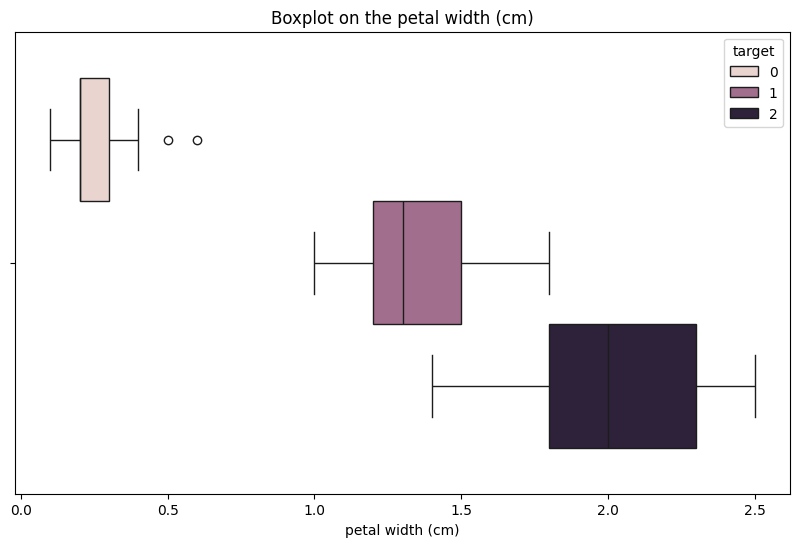

In [25]:
# Boxplots
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='petal width (cm)',hue='target')
plt.xlabel("petal width (cm)")
plt.title("Boxplot on the petal width (cm)")
plt.show()

c:\Users\chall\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chall\anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\chall\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chall\anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in

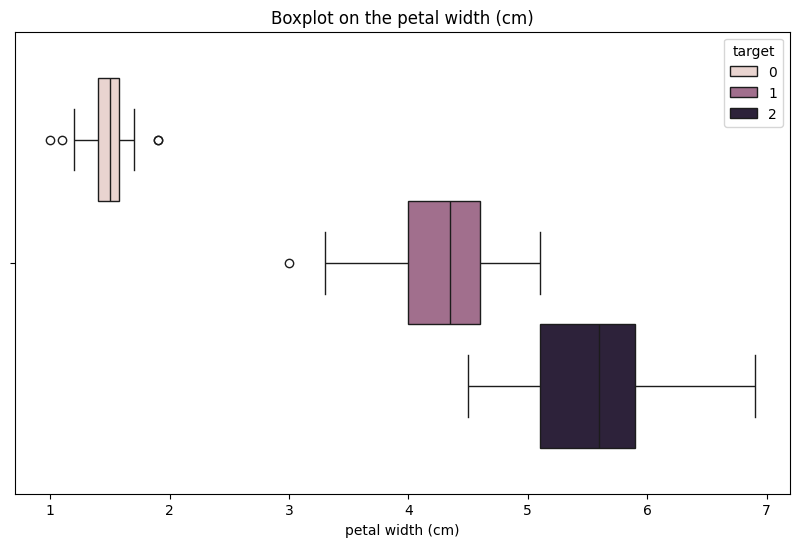

In [26]:
# Boxplots
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='petal length (cm)',hue='target')
plt.xlabel("petal width (cm)")
plt.title("Boxplot on the petal width (cm)")
plt.show()

c:\Users\chall\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chall\anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\chall\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chall\anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in

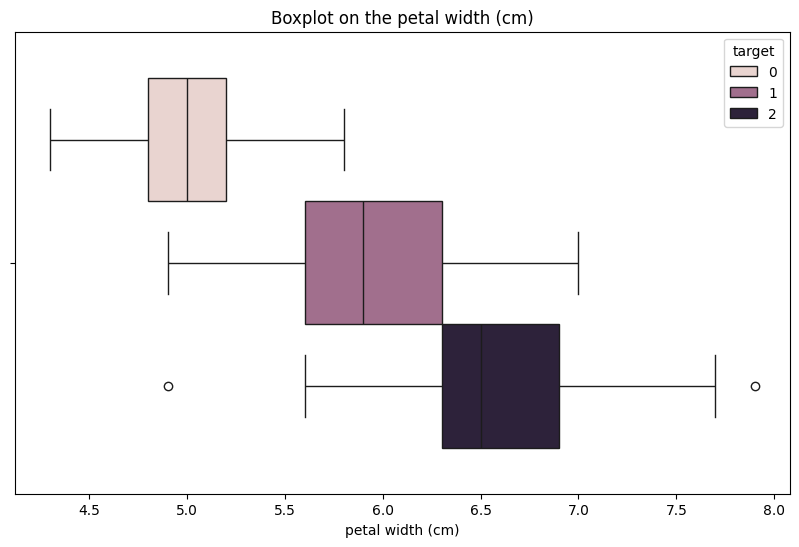

In [27]:
# Boxplots
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='sepal length (cm)',hue='target')
plt.xlabel("petal width (cm)")
plt.title("Boxplot on the petal width (cm)")
plt.show()

c:\Users\chall\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chall\anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\chall\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chall\anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in

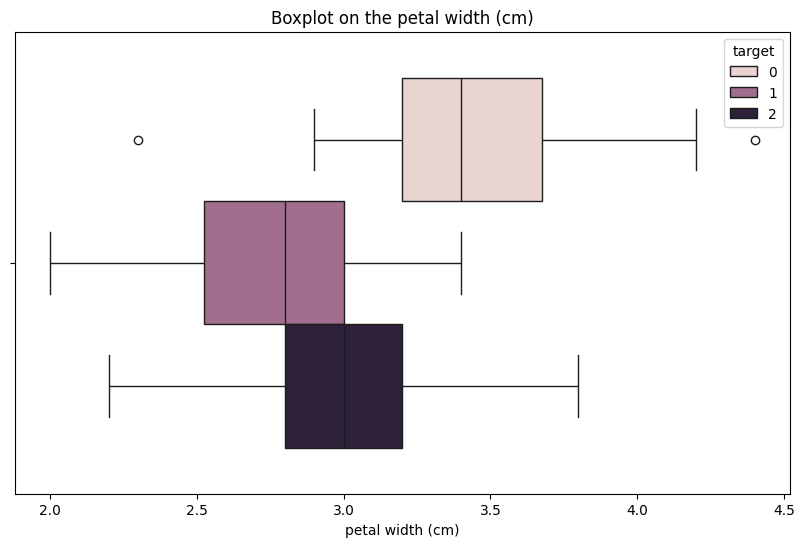

In [28]:
# Boxplots
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='sepal width (cm)',hue='target')
plt.xlabel("petal width (cm)")
plt.title("Boxplot on the petal width (cm)")
plt.show()

# Pipeline

In [34]:
# Drop Duplicates Transformer
class DropDuplicates(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass

    def fit(self,X,y=None):
        return self
    
    def transform(self,X:pd.DataFrame):
        return X.drop_duplicates(inplace=True)

In [60]:
# Numerical and Categorical Pipeline
num_features = X.select_dtypes(["int",'float']).columns
num_transformer = Pipeline(steps=[("scaler",StandardScaler())])
preprocessor = ColumnTransformer(transformers=[("num",num_transformer,num_features)],remainder="drop")
pipeline = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("knn",KNeighborsClassifier(n_neighbors=3))
    ])

In [61]:
# Train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(f"The shape of the X_train is {X_train.shape}")
print(f"The shape of the X_test is {X_test.shape}")
print(f"The shape of the y_train is {y_train.shape}")
print(f"The shape of the y_test is {y_test.shape}")

The shape of the X_train is (120, 4)
The shape of the X_test is (30, 4)
The shape of the y_train is (120,)
The shape of the y_test is (30,)


In [63]:
# Training Model
pipeline.fit(X_train,y_train)
y_test_pred = pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train)

test_accuracy = accuracy_score(y_true=y_test,y_pred=y_test_pred)
train_accuracy = accuracy_score(y_true=y_train,y_pred=y_train_pred)

print(f"The train accuracy is {train_accuracy}")
print(f"The test accuracy is {test_accuracy}")

The train accuracy is 0.9416666666666667
The test accuracy is 1.0


# 

# Hyperparameter Tuning

In [67]:
param_grid = {
    "knn__n_neighbors" : np.arange(1,20,2),
    "knn__weights":["uniform","distance"]
}

# Grid Seachr
gcv = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=3,scoring='accuracy',n_jobs=-1,refit=True)
gcv.fit(X_train,y_train)

print(f"The best parameters: {gcv.best_params_}")
print(f"The best score: {gcv.best_score_}")

y_test_pred = gcv.predict(X_test)
y_train_pred = gcv.predict(X_train)

test_accuracy = accuracy_score(y_true=y_test,y_pred=y_test_pred)
train_accuracy = accuracy_score(y_true=y_train,y_pred=y_train_pred)

print(f"The train accuracy is {train_accuracy}")
print(f"The test accuracy is {test_accuracy}")

The best parameters: {'knn__n_neighbors': 9, 'knn__weights': 'uniform'}
The best score: 0.9666666666666667
The train accuracy is 0.95
The test accuracy is 1.0
